# Compute All Pairwise Distances
This notebook demonstrates how to compute all pairwise distances between rows of a matrix using NumPy and SciPy.

In [2]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

## Generate Example Data
We'll create a matrix `X` with `n` vectors (rows), each of dimensionality `d`.

In [5]:
!ls ../../data/

glove_kmeans_model.pkl  kmeans.pkl              streaming_centroids.npy
glove.6B.300d.txt       shuffled_output.txt


In [7]:
X=np.load('../../data/streaming_centroids.npy')
X.shape

(1000, 300)

## Compute Pairwise Distances
We'll use `scipy.spatial.distance.pdist` and `squareform` to compute a full pairwise distance matrix.

In [10]:
# Compute pairwise Euclidean distances
D_condensed = pdist(X, metric='cosine')
D_full = squareform(D_condensed)
D_full.shape

(1000, 1000)

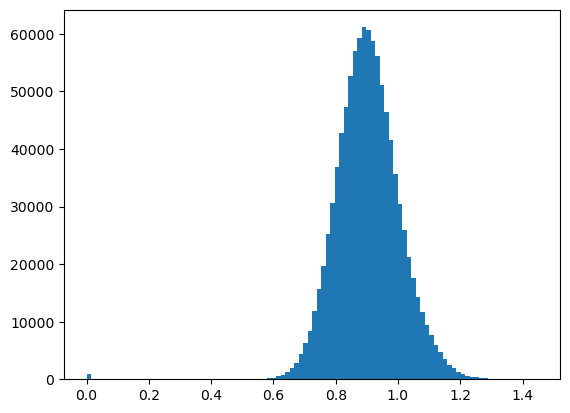

In [13]:
from matplotlib.pylab import *
hist(D_full.flatten(),bins=100);

In [48]:
D_order=np.argsort(D_full,axis=1)
D_sorted=np.sort(D_full,axis=1)
D_sorted[1,:10]

array([0.        , 0.65540748, 0.66281076, 0.67269786, 0.70236125,
       0.71188765, 0.71540833, 0.71649825, 0.72504082, 0.72796402])

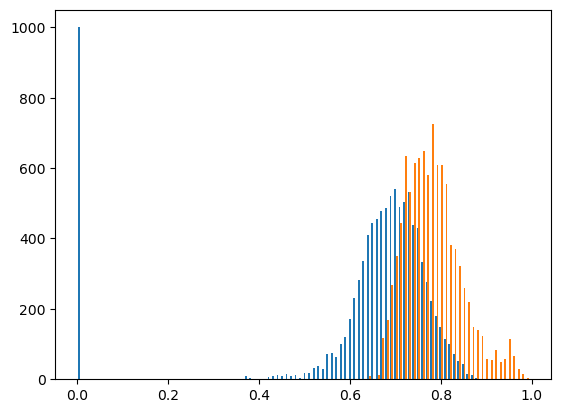

In [25]:
hist([D_sorted[:,0:10].flatten(),D_sorted[:,50:60].flatten()],bins=100);

## create a networkx graph fom 10 closest neighbors

In [49]:
import numpy as np
import networkx as nx

# A is your 1000x10 NumPy array
# Example: A = np.load("neighbors.npy")
A = D_order[:,:10]

G = nx.Graph()

# Add edges from neighbor list
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        neighbor = A[i, j]
        if i != neighbor:  # optional: avoid self-loops
            G.add_edge(i, neighbor)

# Optional: make sure graph has 1000 nodes even if isolated
G.add_nodes_from(range(1000))


In [51]:
G.number_of_nodes()

1000

In [52]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from scipy.sparse import csgraph

# G is your graph (assumed already created as a NetworkX Graph)
L = nx.normalized_laplacian_matrix(G)
vals, vecs = eigsh(L, k=10, which='SM')  # skip eigenvector for eigenvalue=0


In [53]:
L.shape

(1000, 1000)

In [54]:
vals

array([-1.03248678e-16,  1.54588459e-01,  1.92328398e-01,  2.52068865e-01,
        3.25214445e-01,  3.38501230e-01,  3.58271187e-01,  3.82334243e-01,
        4.19879014e-01,  4.28329925e-01])

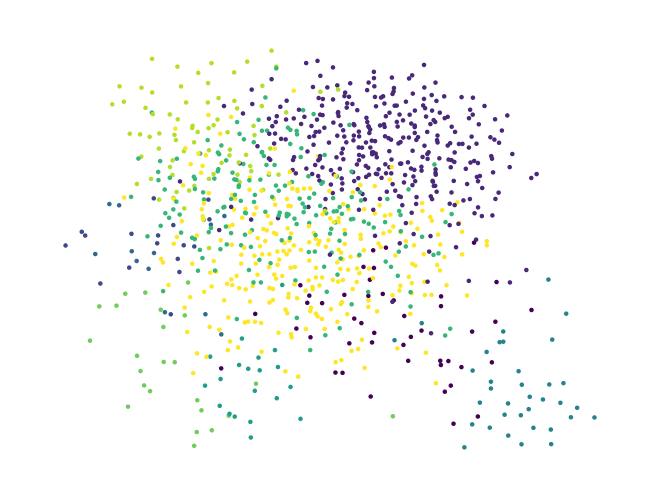

In [77]:
from sklearn.cluster import KMeans

X = vecs[:, 1:11]  # Use top 10 eigenvectors
clusters = KMeans(n_clusters=10).fit_predict(X)

# Assign cluster color to each node
colors = [clusters[i] for i in range(len(G))]
nx.draw(G, pos=nx.spring_layout(G), node_color=colors, node_size=5,\
        edge_color='none',with_labels=False)


In [65]:
nx.draw?

In [67]:
nx.draw_networkx?